# **Week 6 -  Analysis of Two Samples**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.power as smp

## **Exercise 3.5 Transport times**

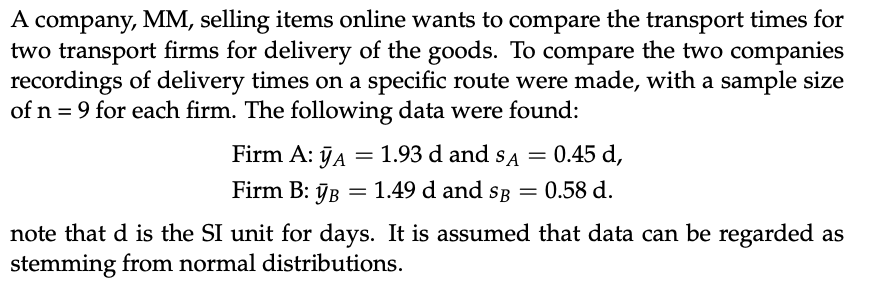

### **a) Hypothesis Testing**

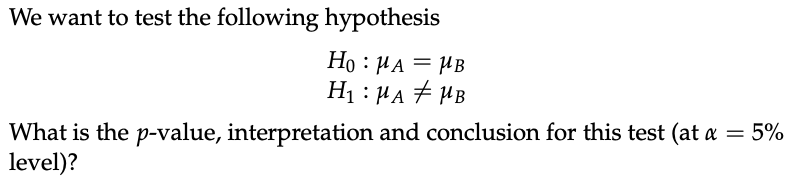

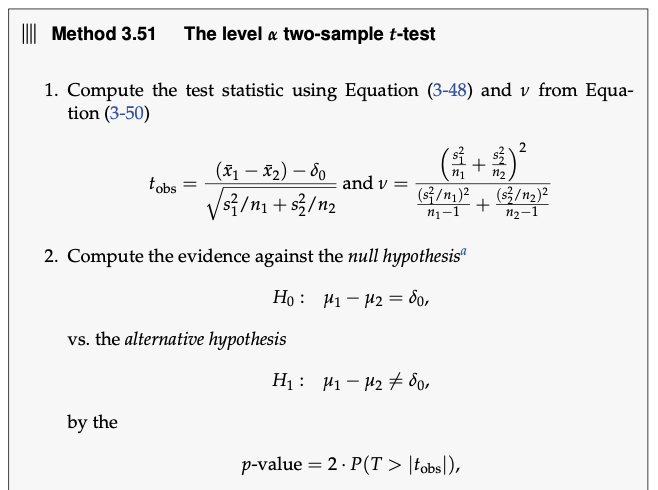

$$
t_{\mathrm{obs}}=\frac{\left(\bar{x}_1-\bar{x}_2\right)-\delta_0}{\sqrt{s_1^2 / n_1+s_2^2 / n_2}} \text { and } v=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{\left(s_1^2 / n_1\right)^2}{n_1-1}+\frac{\left(s_2^2 / n_2\right)^2}{n_2-1}}
$$

In [18]:
mu_A = 1.93
mu_B = 1.49

s_A = 0.45
s_B = 0.58

n_A = 9
n_B = 9

# Calculate t_obs
t_obs = (mu_A - mu_B - 0) / np.sqrt((s_A**2) / n_A + (s_B**2) / n_B)
print(f"t_obs = {t_obs}")

# Degrees of freedom
var_A = s_A**2
var_B = s_B**2
dfs = ((var_A / n_A + var_B / n_B)**2) / \
      ((var_A / n_A)**2 / (n_A - 1) + (var_B / n_B)**2 / (n_B - 1))
print(f"Degrees of freedom = {dfs}")


# p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), dfs))
print(f"p-value = {p_value}")

# Since the p-value is greater than our alpha value, we cannot reject H0 and must conclude that their mean transport times are the same.

t_obs = 1.7981248351046575
Degrees of freedom = 15.069646790733499
p-value = 0.09221726347624926


We cannot reject H0 because the p-value is greater than our alpha on 0.05.

### **b) Find the 95% confidence interval for the mean difference $µ_A−µ_B$.**

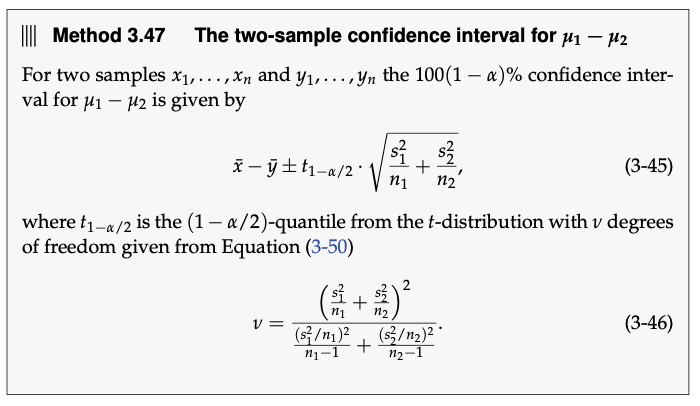

In [19]:
# Find the 95% confidence interval for the mean difference μA − μB
alpha = 0.05
t_quantile = stats.t.ppf(1 - alpha / 2, dfs)
print(f"t-quantile = {t_quantile}")

# Confidence interval
mean_diff = mu_A - mu_B
conf_interval = mean_diff + np.array([-1, 1]) * t_quantile * np.sqrt(var_A / n_A + var_B / n_B)
print(f"95% Confidence Interval for the mean difference: {conf_interval}")

t-quantile = 2.1305918877040537
95% Confidence Interval for the mean difference: [-0.08135448  0.96135448]


We can also see that the confidence interval contains 0.

### **c) Power**

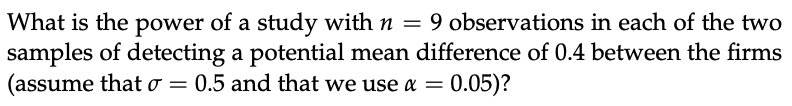

In [20]:
n = 9
delta = 0.4
sd = 0.5
alpha = 0.05
print(smp.TTestIndPower().solve_power(nobs1=n, effect_size = delta/sd,
alpha=alpha))

0.35794895150011175


Not very high power, which is not good if we want to reject H0. Usually we aim for 80%.

### **d) Effect size**

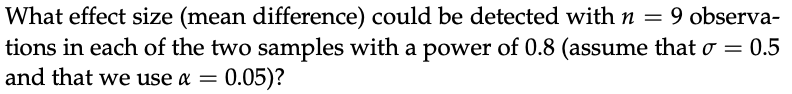

In [21]:
n = 9
power = 0.8
sd = 0.5
alpha = 0.05
effect = smp.TTestIndPower().solve_power(nobs1=n, alpha=alpha,
power=power)
delta = effect*sd

print(delta)

0.7034623345972917


So a potential mean difference of 0.70 is detectable with probability 0.8 by such a study.

### **e) Sample size**

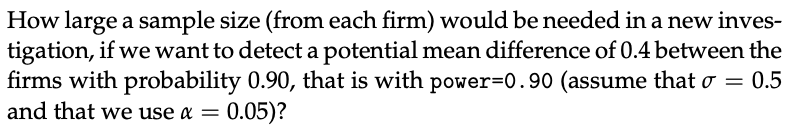

In [22]:
power = 0.9
sd = 0.5
delta = 0.4
alpha = 0.05
print(smp.TTestIndPower().solve_power(effect_size=delta/sd,
alpha=alpha, power=power))



33.825543836843956


So n = 34 in each sample would do the job!

## **Exercise 3.6 Cholesterol**

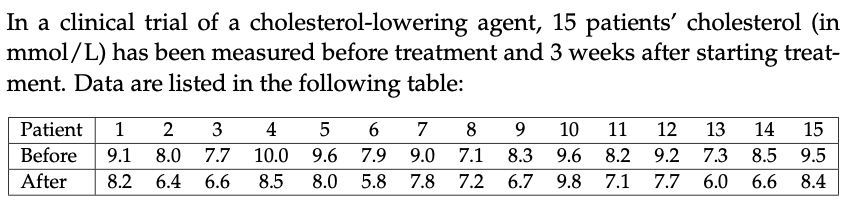

In [23]:
x1 = np.array([9.1, 8.0, 7.7, 10.0, 9.6, 7.9, 9.0, 7.1,
8.3, 9.6, 8.2, 9.2, 7.3, 8.5, 9.5])
x2 = np.array([8.2, 6.4, 6.6, 8.5, 8.0, 5.8, 7.8, 7.2,
6.7, 9.8, 7.1, 7.7, 6.0, 6.6, 8.4])
# Independent
t_obs,p_val = stats.ttest_ind(x1,x2,equal_var=False)
print("Independent:", t_obs, p_val)

# Paired
t_obs,p_val = stats.ttest_rel(x1,x2)
print("Paired:", t_obs, p_val)


Independent: 3.3206371615181602 0.0025776851099507973
Paired: 7.340653674886342 3.672251864593521e-06


### **a) Can there, based on these data be demonstrated a significant decrease in cholesterol levels with α = 0.001?**

This is a paired setup.

The pvalue is much smaller than 0.001, so there is a difference in cholesterol.

## **Exercise 3.7 Pulse**

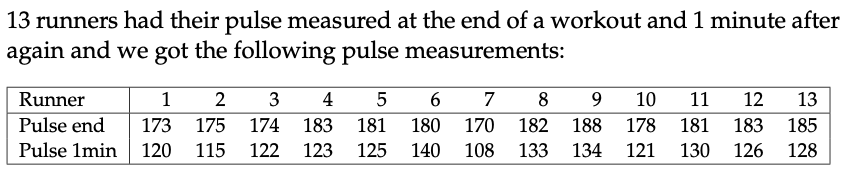

In [24]:
Pulse_end = np.array([173,175,174,183,181,180,170,
182,188,178,181,183,185])
Pulse_1min = np.array([120,115,122,123,125,140,108,
133,134,121,130,126,128])
print(np.mean(Pulse_end))

print(np.mean(Pulse_1min))

print(np.std(Pulse_end, ddof=1))

print(np.std(Pulse_1min, ddof=1))

print(np.std(Pulse_end-Pulse_1min, ddof=1))


179.46153846153845
125.0
5.189980485117207
8.406346808612328
5.767948575466911


### **a) 99% CI of the mean**

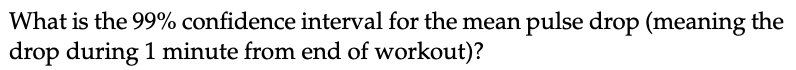

When its a paired setting, we use one-sample theory for the CI:

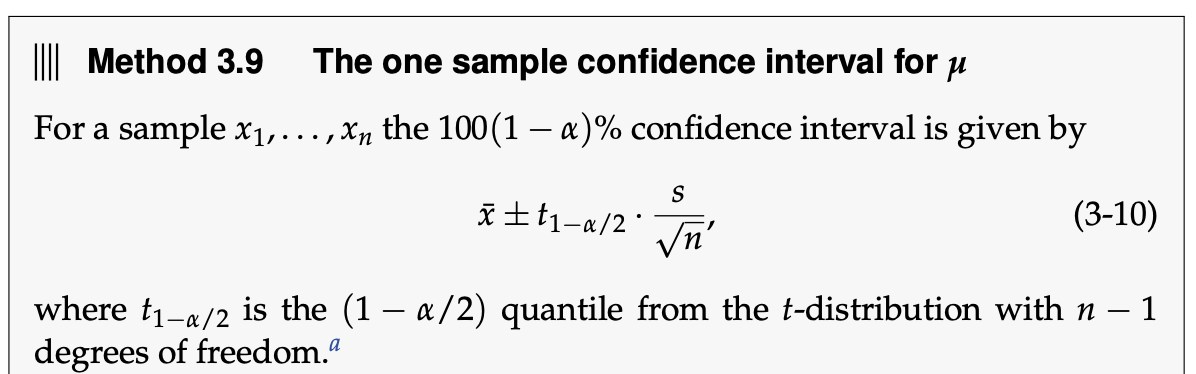

In [25]:
# Calculate the mean difference
mean_diff = np.mean(Pulse_end-Pulse_1min)

# Degrees of freedom
n = len(Pulse_end)
df = n-1

# t_1-alpha/2 quantile
alpha = 0.01
t_quantile = stats.t.ppf(1 - alpha / 2, df)

# Standard deviation of the differences
std_diff = np.std(Pulse_end - Pulse_1min, ddof=1)
 

# Confidence interval
conf_interval = mean_diff + np.array([-1, 1]) * t_quantile * std_diff / np.sqrt(n)
print(f"95% Confidence Interval for the mean difference: {conf_interval}")

95% Confidence Interval for the mean difference: [49.57506593 59.34801099]


In [26]:
#or using the built-in function
CI_low, CI_high = stats.ttest_rel(Pulse_end, Pulse_1min).confidence_interval(confidence_level=0.99)

print(f"95% Confidence Interval for the mean difference: {CI_low, CI_high}")


95% Confidence Interval for the mean difference: (49.57506593037534, 59.34801099270158)


### **b) 95% CI of STD**

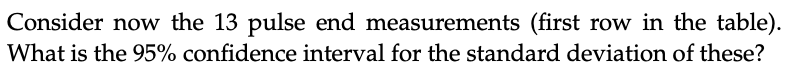

In [27]:
# Using method 3.19:
alpha = 0.05
n = len(Pulse_end)

# Confidence interval for variance
var_conf = [
    (n - 1) * np.var(Pulse_end, ddof=1) / stats.chi2.ppf(1 - alpha / 2, n - 1),
    (n - 1) * np.var(Pulse_end, ddof=1) / stats.chi2.ppf(alpha / 2, n - 1)
]
print(f"95% Confidence Interval for Variance: {var_conf}")

# Confidence interval for standard deviation
std_conf = np.sqrt(var_conf)
print(f"95% Confidence Interval for Standard Deviation: {std_conf}")

95% Confidence Interval for Variance: [13.850770060082676, 73.39834070558203]
95% Confidence Interval for Standard Deviation: [3.72166227 8.56728316]


## **Exercise 3.8 Foil production**

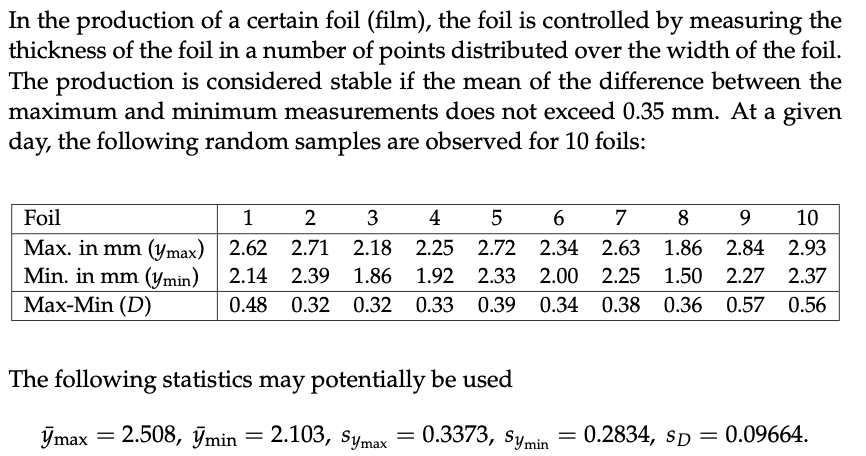

### **a) What is a 95% confidence interval for the mean difference?**

In [28]:
mu_max = 2.508
mu_min = 2.103

s_max = 0.3373
s_min = 0.2834

s_diff = 0.09664

# Calculate the mean difference
mean_diff = mu_max - mu_min

# Degrees of freedom
n = 10
df = n - 1

# t_1-alpha/2 quantile
alpha = 0.05
t_quantile = stats.t.ppf(1 - alpha / 2, df)
print(f"t-quantile = {t_quantile}")

# Confidence interval
conf_interval = mean_diff + np.array([-1, 1]) * t_quantile * s_diff / np.sqrt(n)
print(f"95% Confidence Interval for the mean difference: {conf_interval}")


t-quantile = 2.262157162740991
95% Confidence Interval for the mean difference: [0.33586791 0.47413209]


### **b) Hypothesis testing**

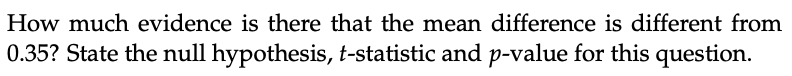

In [29]:
# Calculate the t-statistic using method 3.36 (one sample t-test)
t_obs = (mean_diff - 0.35) / (s_diff / np.sqrt(n))
print(f"t_obs = {t_obs}")

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), df))
print(f"p-value = {p_value}")

t_obs = 1.7997234200047632
p-value = 0.10543681559704599


Since the p-value is greater than our alpha value, we cannot reject H0 and must conclude that their mean transport times are the same.

## **Exercise 3.9 Course project**

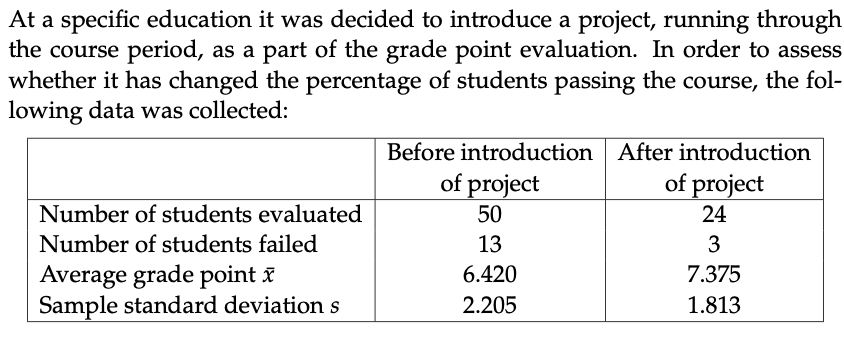

### **a) Hypothesis testing**

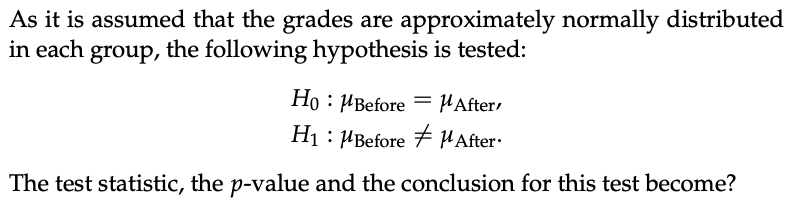

In [30]:
# Given data
mean1 = 6.420
mean2 = 7.375

mean_diff = mean1 - mean2

std1 = 2.205
std2 = 1.813
n1 = 50
n2 = 24

# Calculate the t-statistic using method 3.49
t_obs = mean_diff / np.sqrt((std1**2) / n1 + (std2**2) / n2)
print(f"t_obs = {t_obs}")

# Degrees of freedom
vs1 = std1**2
vs2 = std2**2
dfs = ((vs1 / n1 + vs2 / n2)**2) / \
      ((vs1 / n1)**2 / (n1 - 1) + (vs2 / n2)**2 / (n2 - 1))
print(f"Degrees of freedom = {dfs}")

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), dfs))
print(f"p-value = {p_value}")

t_obs = -1.9733867395024223
Degrees of freedom = 54.38590559936726
p-value = 0.05354166928745885


Since the p-value is greater than our alpha value, we cannot reject H0.

### **b) A 99% confidence interval for the mean grade point difference is?**

In [31]:
# t_1-alpha/2 quantile
alpha = 0.01
t_quantile = stats.t.ppf(1 - alpha / 2, dfs)
print(f"t-quantile = {t_quantile}")

# Confidence interval
conf_interval = mean_diff + np.array([-1, 1]) * t_quantile * np.sqrt(vs1 / n1 + vs2 / n2)
print(f"99% Confidence Interval for the mean difference: {conf_interval}")

t-quantile = 2.669294238618331
99% Confidence Interval for the mean difference: [-2.2467772  0.3367772]


We can also see that the confidence interval contains 0.

### **c) 95% confidence interval for STD**

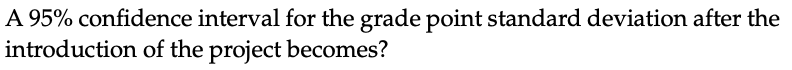

In [32]:
# Given data
alpha = 0.05
n = 24
var_after = std2**2

# Confidence interval for variance
var_conf = [
    (n - 1) * var_after / stats.chi2.ppf(1 - alpha / 2, n - 1),
    (n - 1) * var_after /stats.chi2.ppf(alpha / 2, n - 1)
]
print(f"95% Confidence Interval for Variance: {var_conf}")

# Confidence interval for standard deviation
std_conf = np.sqrt(var_conf)
print(f"95% Confidence Interval for Standard Deviation: {std_conf}")

95% Confidence Interval for Variance: [1.9855296539939087, 6.467891617504821]
95% Confidence Interval for Standard Deviation: [1.40908823 2.54320499]


## **Exercise 3.10 Concrete items (sample size)**

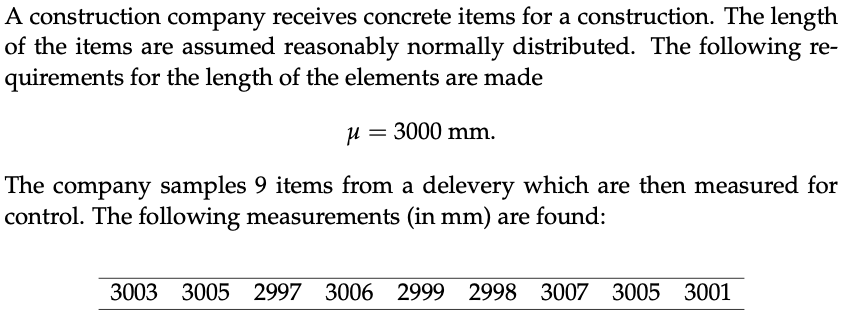

In [33]:
samples = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])

### **a) Sample size for 90%**

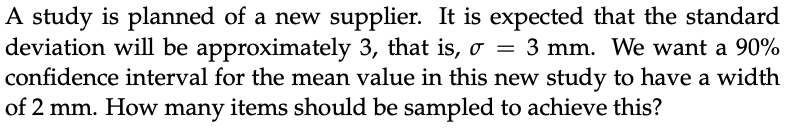

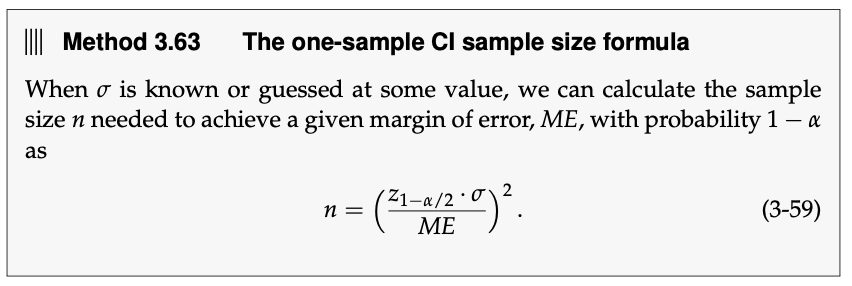

In [34]:
# Given data
alpha = 0.10
sigma = 3
width = 2
ME = width/2

# z-quantile
z_quantile = stats.norm.ppf(1 - alpha / 2)
print(f"z-quantile = {z_quantile}")

# Calculate the required sample size
n = (z_quantile * sigma / ME)**2
print(f"Required sample size (rounded up): {np.ceil(n)}")

z-quantile = 1.6448536269514722
Required sample size (rounded up): 25.0


### **b) Sample size for 99%**

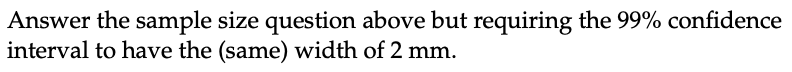

In [35]:
# Given data
alpha = 0.01
sigma = 3
width = 2
ME = width / 2

# z-quantile
z_quantile = stats.norm.ppf(1 - alpha / 2)
print(f"z-quantile = {z_quantile}")

# Calculate the required sample size
n = (z_quantile * sigma / ME)**2
print(f"Required sample size (rounded up): {np.ceil(n)}")

z-quantile = 2.5758293035489004
Required sample size (rounded up): 60.0
